In [1]:
import re

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import os
import zipfile
import xlrd
import plotly.express as px
import re

In [207]:
df = pd.read_csv(r'datasets/ads_data.csv', parse_dates=['date', 'time'])

In [208]:
df

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [209]:
df.client_union_id.nunique()

838

In [4]:
df.dtypes

date                     datetime64[ns]
time                     datetime64[ns]
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
dtype: object

In [5]:
df_mean = df.groupby(['ad_id','event'], as_index=False).date.count().rename(columns={'date':'counts'})

In [6]:
df_mean

,ad_id,event,counts
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1
...,...,...,...
1476,122013,view,156
1477,122023,view,68
1478,122031,click,1
1479,122031,view,138


In [19]:
df_pivot = df_mean.pivot(index='ad_id', columns='event', values='counts').reset_index().fillna(0)

In [20]:
df_pivot

event,ad_id,click,view
0,2,1.0,101.0
1,3,3.0,184.0
2,1902,1.0,41.0
3,2064,0.0,35.0
4,2132,1.0,58.0
...,...,...,...
960,122004,4.0,100.0
961,122013,0.0,156.0
962,122023,0.0,68.0
963,122031,1.0,138.0


In [10]:
df_pivot[['click', 'view']].mean()

event
click    113.137824
view     923.131606
dtype: float64

In [33]:
df_pivot1 = df_mean.pivot(index='ad_id', columns='event', values='counts').reset_index().dropna(subset=['view'])

In [34]:
df_pivot1

event,ad_id,click,view
0,2,1.0,101.0
1,3,3.0,184.0
2,1902,1.0,41.0
3,2064,NaN,35.0
4,2132,1.0,58.0
...,...,...,...
960,122004,4.0,100.0
961,122013,NaN,156.0
962,122023,NaN,68.0
963,122031,1.0,138.0


In [43]:
sns.set(
    font_scale=2,
    style='whitegrid',
    rc={'figure.figsize':(30,8)}
)

In [36]:
log_views = np.log(df_pivot1['view'])

In [37]:
log_views

0      4.615121
1      5.214936
2      3.713572
3      3.555348
4      4.060443
         ...   
960    4.605170
961    5.049856
962    4.219508
963    4.927254
964    3.737670
Name: view, Length: 956, dtype: float64

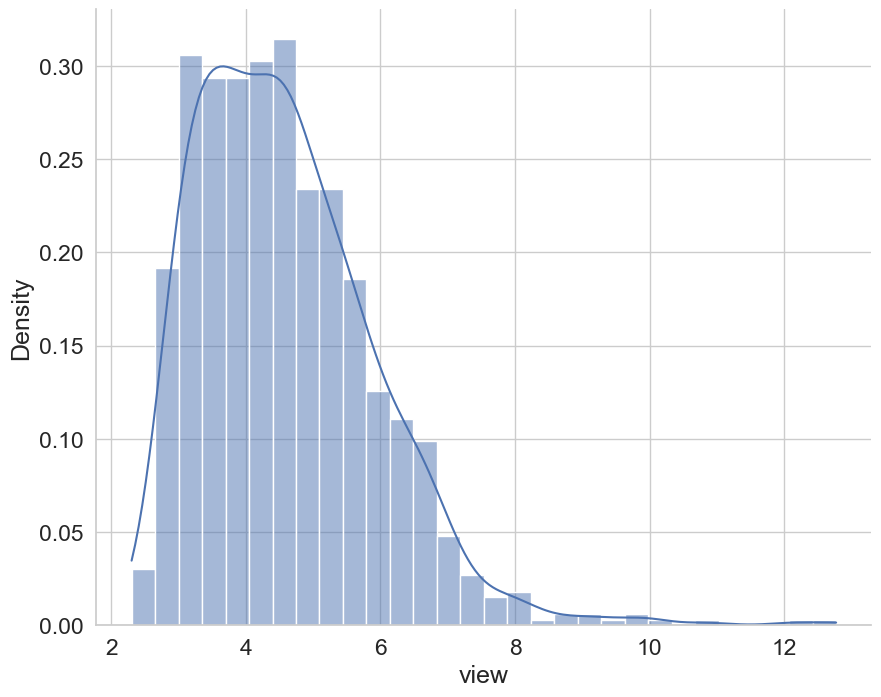

In [57]:
sns.set(
    font_scale=1.5,
    style='whitegrid',
    rc={'figure.figsize':(10,8)}
)
ax = sns.histplot(data=log_views, kde=True, stat='density')
sns.despine()

In [58]:
df.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [65]:
rol = df.loc[df.event == 'view'].groupby(['date','event'],as_index=0).ad_id.value_counts() 
    

In [87]:
rol

,date,event,ad_id,count
0,2019-04-01,view,16589,1245
1,2019-04-01,view,4922,1211
2,2019-04-01,view,120299,820
3,2019-04-01,view,38376,785
4,2019-04-01,view,120378,727
...,...,...,...,...
1926,2019-04-06,view,18681,1
1927,2019-04-06,view,27581,1
1928,2019-04-06,view,35615,1
1929,2019-04-06,view,98274,1


In [108]:
# view_data = df.loc[df.event == 'view']
# views_per_date = view_data.groupby('date')['ad_id'].count()
# views_per_date = view_data.groupby(['date', 'ad_id']).size().groupby('date').mean()
v= df.loc[df.event =='view'].groupby(['date', 'ad_id']).size().groupby('date').mean()

In [109]:
v

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
dtype: float64

In [82]:
day_df = df.loc[df.event =='view'].pivot_table(index='ad_id', columns='date', values='time', aggfunc='count')

In [83]:
day_df

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,NaN,NaN,NaN,NaN
3,158.0,26.0,NaN,NaN,NaN,NaN
1902,NaN,NaN,34.0,7.0,NaN,NaN
2064,NaN,28.0,7.0,NaN,NaN,NaN
2132,NaN,NaN,25.0,27.0,6.0,NaN
...,...,...,...,...,...,...
122004,85.0,15.0,NaN,NaN,NaN,NaN
122013,NaN,NaN,NaN,134.0,22.0,NaN
122023,NaN,NaN,NaN,53.0,15.0,NaN


In [140]:
mean_d = day_df.mean()

In [141]:
mean_d

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
dtype: float64

In [145]:
vk= df.loc[df.event =='view'].groupby(['date', 'ad_id']).size().groupby('date').mean().rolling(2).mean().fillna(154)

In [146]:
vk

date
2019-04-01    154.000000
2019-04-02    146.134626
2019-04-03    150.869880
2019-04-04    419.927249
2019-04-05    797.505699
2019-04-06    598.116202
dtype: float64

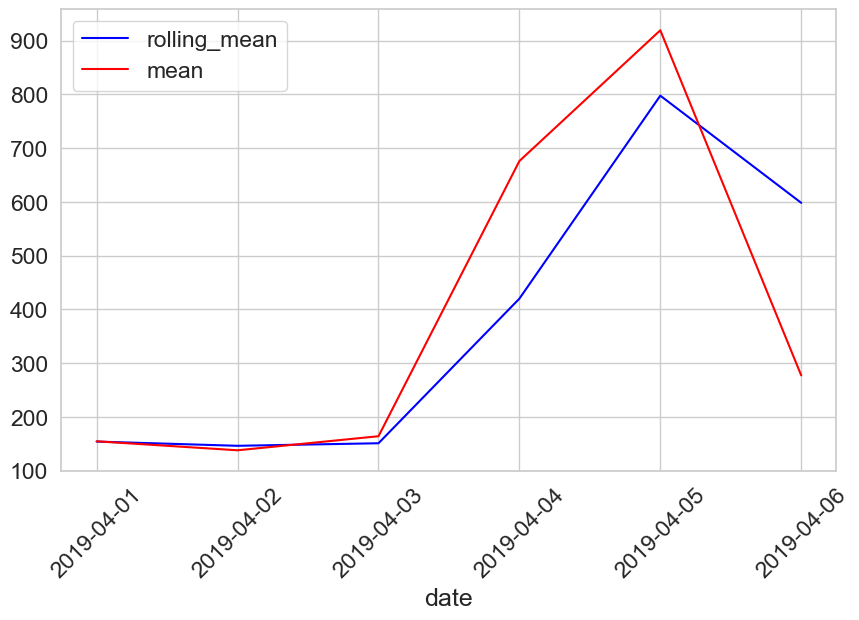

<Figure size 1000x800 with 0 Axes>

In [148]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(vk, color='blue', label='rolling_mean')
sns.lineplot(mean_d, color='red', label='mean')
ax.legend()
plt.xticks(rotation=45)
plt.show()

sns.despine()

In [149]:
df.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [157]:
client_df = pd.read_csv(r'datasets/ads_clients_data.csv', parse_dates=['date', 'create_date'])

In [164]:
client_df.community_id=client_df.community_id.abs()

In [165]:
client_df

,date,client_union_id,community_id,create_date
0,2020-05-07,1,130371893,2018-12-24
1,2020-05-07,2,130304626,2019-02-10
2,2020-05-07,3,130462599,2019-01-25
3,2020-05-07,4,130574300,2018-12-09
4,2020-05-07,5,130292358,2019-01-08
...,...,...,...,...
122073,2020-05-07,122074,130470790,2018-12-21
122074,2020-05-07,122075,130911261,2018-11-09
122075,2020-05-07,122076,130494912,2018-10-27
122076,2020-05-07,122077,130910585,2018-12-05


In [210]:
client_df.client_union_id.nunique()

122078

In [166]:
client_df.dtypes

date               datetime64[ns]
client_union_id             int64
community_id                int64
create_date        datetime64[ns]
dtype: object

In [167]:
merged = client_df.merge(df,on=['client_union_id'], suffixes=['_client_df', '_ads_df'])

In [169]:
merged.head()

,date_client_df,client_union_id,community_id,create_date,date_ads_df,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2020-05-07,1,130371893,2018-12-24,2019-04-01,2019-04-01 00:08:51,view,android,3,1,CPC,46.7,0,45035
1,2020-05-07,1,130371893,2018-12-24,2019-04-01,2019-04-01 00:09:36,view,ios,3,1,CPC,46.7,0,45035
2,2020-05-07,1,130371893,2018-12-24,2019-04-01,2019-04-01 00:29:30,view,ios,3,1,CPC,46.7,0,45035
3,2020-05-07,1,130371893,2018-12-24,2019-04-01,2019-04-01 00:29:58,view,android,3,1,CPC,46.7,0,45035
4,2020-05-07,1,130371893,2018-12-24,2019-04-01,2019-04-01 00:51:54,view,android,3,1,CPC,46.7,0,45035


In [211]:
merged.client_union_id.nunique()

838

In [170]:
merged.dtypes

date_client_df           datetime64[ns]
client_union_id                   int64
community_id                      int64
create_date              datetime64[ns]
date_ads_df              datetime64[ns]
time                     datetime64[ns]
event                            object
platform                         object
ad_id                             int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
dtype: object

In [171]:
merged['difference'] = merged['date_ads_df']- merged['create_date']

In [220]:
min_diff = merged.groupby('client_union_id',as_index=False).difference.min().rename(columns={'difference':'min_date_to_first_ad'})

In [188]:
min_diff()

,client_union_id,min_date_to_first_ad
0,1,98 days
1,9,114 days
2,13,66 days
3,16,105 days
4,20,32 days
...,...,...
833,122004,67 days
834,122013,151 days
835,122023,126 days
836,122031,96 days


In [190]:
min_diff.min_date_to_first_ad.mean()

Timedelta('124 days 09:04:43.532219570')

In [191]:
min_diff.min_date_to_first_ad.mean().days

124

In [192]:
okno = pd.Timedelta(365, unit='day')

In [195]:
baba = min_diff.loc[min_diff.min_date_to_first_ad < okno]

In [214]:
df.client_union_id.nunique()

838

In [216]:
float(
    np.round(len(baba) / client_df.client_union_id.nunique() * 100,2))

0.69

In [223]:
bins = [0,30,90,180,365]
bins = [pd.Timedelta(x,'d') for x in bins]
labels = ['0-30','30-90','90-180','180-365']
ga = pd.cut(min_diff.min_date_to_first_ad, bins,labels=labels)

In [224]:
ga.value_counts()

min_date_to_first_ad
90-180     396
30-90      263
180-365    168
0-30        11
Name: count, dtype: int64